# Imports

In [44]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Data

In [3]:
# Read in data, convert date column to datetime format, set date column as index
data = Path("Data/2_deep_learning/combined_data_df.csv")
data_df = pd.read_csv(data)
data_df['date'] = pd.to_datetime(data_df['date'])
data_df = data_df.set_index('date')
data_df.head()

,DJIA,DIJA_open,DIJA_high,DIJA_Low,DIJA_vol,DIJA_pct_change,NASDAQ,NASDAQ_open,NASDAQ_high,NASDAQ_low,...,BTC_low,BTC_vol,BTC_pct_change,GDP,CPI,IPI,UNEMP,NFP,IUC,FED
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,17148.94,17405.48,17405.48,16957.63,148060000.0,-1.58,4903.09,4897.65,4903.09,4846.98,...,427.0,13020.0,0.99,18382.82,237.80,102.88,4.9,143195.45,276142.86,4486600.57
2016-01-05,17158.66,17147.50,17195.84,17038.61,105750000.0,0.06,4891.43,4917.84,4926.73,4872.74,...,428.2,11220.0,-0.24,18383.82,237.79,102.86,4.9,143203.94,277714.29,4486603.29
2016-01-06,16906.51,17154.83,17154.83,16817.62,120250000.0,-1.47,4835.77,4813.76,4866.04,4804.69,...,425.0,8740.0,-0.89,18384.82,237.78,102.83,4.9,143212.42,279285.71,4486606.00
2016-01-07,16514.10,16888.36,16888.36,16463.63,176240000.0,-2.32,4689.43,4736.40,4788.02,4688.17,...,427.1,55660.0,7.26,18385.83,237.77,102.81,4.9,143220.90,280857.14,4488761.57
2016-01-08,16346.45,16519.17,16651.89,16314.57,141850000.0,-1.02,4643.63,4722.02,4742.57,4637.85,...,446.8,30450.0,-1.10,18386.83,237.76,102.79,4.9,143229.39,282428.57,4490917.14


In [4]:
# Move BTC column to the end
df1 = data_df.pop('BTC') # remove column b and store it in df1
data_df['BTC']=df1 # add b series as a 'new' column.
data_df.head()

,DJIA,DIJA_open,DIJA_high,DIJA_Low,DIJA_vol,DIJA_pct_change,NASDAQ,NASDAQ_open,NASDAQ_high,NASDAQ_low,...,BTC_vol,BTC_pct_change,GDP,CPI,IPI,UNEMP,NFP,IUC,FED,BTC
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,17148.94,17405.48,17405.48,16957.63,148060000.0,-1.58,4903.09,4897.65,4903.09,4846.98,...,13020.0,0.99,18382.82,237.80,102.88,4.9,143195.45,276142.86,4486600.57,432.9
2016-01-05,17158.66,17147.50,17195.84,17038.61,105750000.0,0.06,4891.43,4917.84,4926.73,4872.74,...,11220.0,-0.24,18383.82,237.79,102.86,4.9,143203.94,277714.29,4486603.29,431.8
2016-01-06,16906.51,17154.83,17154.83,16817.62,120250000.0,-1.47,4835.77,4813.76,4866.04,4804.69,...,8740.0,-0.89,18384.82,237.78,102.83,4.9,143212.42,279285.71,4486606.00,428.0
2016-01-07,16514.10,16888.36,16888.36,16463.63,176240000.0,-2.32,4689.43,4736.40,4788.02,4688.17,...,55660.0,7.26,18385.83,237.77,102.81,4.9,143220.90,280857.14,4488761.57,459.0
2016-01-08,16346.45,16519.17,16651.89,16314.57,141850000.0,-1.02,4643.63,4722.02,4742.57,4637.85,...,30450.0,-1.10,18386.83,237.76,102.79,4.9,143229.39,282428.57,4490917.14,454.0


In [5]:
# Get the total number of columns in the dataframe
cols = list(data_df.columns.values)
len(cols)

63

In [6]:
# Show all columns in the dataframe
cols

['DJIA',
 'DIJA_open',
 'DIJA_high',
 'DIJA_Low',
 'DIJA_vol',
 'DIJA_pct_change',
 'NASDAQ',
 'NASDAQ_open',
 'NASDAQ_high',
 'NASDAQ_low',
 'NASDAQ_vol',
 'NASDAQ_pct_change',
 'S&P500',
 'S&P500_open',
 'S&P500_high',
 'S&P500_low',
 'S&P500_pct_change',
 'CBOE',
 'CBOE_open',
 'CBOE_high',
 'CBOE_low',
 'CBOE_pct_change',
 'GOLD',
 'GOLD_open',
 'GOLD_high',
 'GOLD_low',
 'GOLD_vol',
 'GOLD_pct_change',
 'SILVER',
 'SILVER_open',
 'SILVER_high',
 'SILVER_low',
 'SILVER_vol',
 'SILVER_pct_change',
 'DOLLAR',
 'DOLLAR_open',
 'DOLLAR_high',
 'DOLLAR_low',
 'DOLLAR_pct_change',
 'WTI',
 'WTI_open',
 'WTI_high',
 'WTI_low',
 'WTI_vol',
 'WTI_pct_change',
 '10YR',
 '10YR_open',
 '10YR_high',
 '10YR_low',
 '10YR_pct_change',
 'BTC_open',
 'BTC_high',
 'BTC_low',
 'BTC_vol',
 'BTC_pct_change',
 'GDP',
 'CPI',
 'IPI',
 'UNEMP',
 'NFP',
 'IUC',
 'FED',
 'BTC']

# Deep Neural Network

In [7]:
# Create the features (X) and target (y) sets
X = data_df.iloc[:, 0:63].values
y = data_df["BTC"].values

In [8]:
# Scale the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [9]:
# Define the model - shallow neural net
number_hidden_nodes = 40
number_input_features = 63

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [10]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=300)

Epoch 1/300
36/36 [==============================] - 0s 5ms/step - loss: 30677516.0000 - mse: 30677516.0000 - val_loss: 71367808.0000 - val_mse: 71367808.0000
Epoch 2/300
36/36 [==============================] - 0s 1ms/step - loss: 30641880.0000 - mse: 30641880.0000 - val_loss: 71332864.0000 - val_mse: 71332864.0000
Epoch 3/300
36/36 [==============================] - 0s 1ms/step - loss: 30584140.0000 - mse: 30584140.0000 - val_loss: 71267048.0000 - val_mse: 71267048.0000
Epoch 4/300
36/36 [==============================] - 0s 1ms/step - loss: 30499234.0000 - mse: 30499234.0000 - val_loss: 71164216.0000 - val_mse: 71164216.0000
Epoch 5/300
36/36 [==============================] - 0s 1ms/step - loss: 30380482.0000 - mse: 30380482.0000 - val_loss: 71023944.0000 - val_mse: 71023944.0000
Epoch 6/300
36/36 [==============================] - 0s 1ms/step - loss: 30233086.0000 - mse: 30233086.0000 - val_loss: 70847448.0000 - val_mse: 70847448.0000
Epoch 7/300
36/36 [===========================

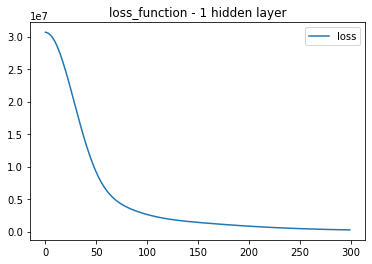

In [11]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [12]:
# Define the model - deep neural net
number_input_features = 63
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25
hidden_nodes_layer4 = 12

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

# Fourth hidden layer
nn.add(Dense(units=hidden_nodes_layer4, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [13]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.2, epochs=1000)

Epoch 1/1000
41/41 [==============================] - 0s 4ms/step - loss: 34649408.0000 - mse: 34649408.0000 - val_loss: 75842936.0000 - val_mse: 75842936.0000
Epoch 2/1000
41/41 [==============================] - 0s 1ms/step - loss: 34431240.0000 - mse: 34431240.0000 - val_loss: 75350352.0000 - val_mse: 75350352.0000
Epoch 3/1000
41/41 [==============================] - 0s 1ms/step - loss: 32017776.0000 - mse: 32017776.0000 - val_loss: 71043576.0000 - val_mse: 71043576.0000
Epoch 4/1000
41/41 [==============================] - 0s 1ms/step - loss: 19708568.0000 - mse: 19708568.0000 - val_loss: 52810048.0000 - val_mse: 52810048.0000
Epoch 5/1000
41/41 [==============================] - 0s 1ms/step - loss: 5364291.5000 - mse: 5364291.5000 - val_loss: 40995120.0000 - val_mse: 40995120.0000
Epoch 6/1000
41/41 [==============================] - 0s 1ms/step - loss: 3767059.0000 - mse: 3767059.0000 - val_loss: 39503112.0000 - val_mse: 39503112.0000
Epoch 7/1000
41/41 [========================

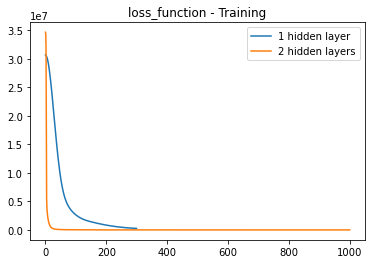

In [14]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

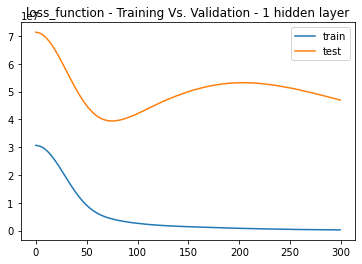

In [15]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

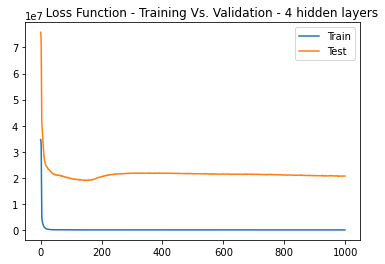

In [23]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("          Loss Function - Training Vs. Validation - 4 hidden layers")
plt.legend(["Train", "Test"])
plt.show()

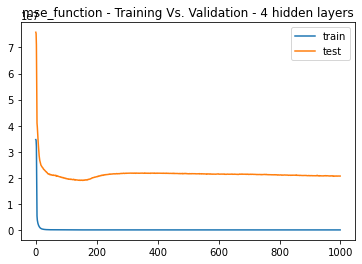

In [17]:
# Train vs test for deep net
plt.plot(model_2.history["mse"])
plt.plot(model_2.history["val_mse"])
plt.title("mse_function - Training Vs. Validation - 4 hidden layers")
plt.legend(["train", "test"])
plt.show()

# LSTM

In [83]:
data_df.shape

(1640, 63)

In [84]:
data_df.isna().sum()

DJIA                 0
DIJA_open            0
DIJA_high            0
DIJA_Low             0
DIJA_vol             0
DIJA_pct_change      0
NASDAQ               0
NASDAQ_open          0
NASDAQ_high          0
NASDAQ_low           0
NASDAQ_vol           0
NASDAQ_pct_change    0
S&P500               0
S&P500_open          0
S&P500_high          0
S&P500_low           0
S&P500_pct_change    0
CBOE                 0
CBOE_open            0
CBOE_high            0
CBOE_low             0
CBOE_pct_change      0
GOLD                 0
GOLD_open            0
GOLD_high            0
GOLD_low             0
GOLD_vol             0
GOLD_pct_change      0
SILVER               0
SILVER_open          0
                    ..
SILVER_pct_change    0
DOLLAR               0
DOLLAR_open          0
DOLLAR_high          0
DOLLAR_low           0
DOLLAR_pct_change    0
WTI                  0
WTI_open             0
WTI_high             0
WTI_low              0
WTI_vol              0
WTI_pct_change       0
10YR       

In [159]:
def window_data(data_df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X_lstm) and the target (y_lstm).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X_lstm = []
    y_lstm = []
    for i in range(len(data_df) - window - 1):
        features = data_df.iloc[i : (i + window), feature_col_number]
        target = data_df.iloc[(i + window), target_col_number]
        X_lstm.append(features)
        y_lstm.append(target)
    return np.array(X_lstm), np.array(y_lstm).reshape(-1, 1)

In [160]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 5

feature_column = 62
target_column = 62
X_lstm, y_lstm = window_data(data_df, window_size, feature_column, target_column)
print (f"X sample values:\n{X_lstm[:5]} \n")
print (f"y sample values:\n{y_lstm[:5]}")

X sample values:
[[432.9 431.8 428.  459.  454. ]
 [431.8 428.  459.  454.  449.2]
 [428.  459.  454.  449.2 449.4]
 [459.  454.  449.2 449.4 449.3]
 [454.  449.2 449.4 449.3 432. ]] 

y sample values:
[[449.2]
 [449.4]
 [449.3]
 [432. ]
 [431.1]]


In [163]:
# Use 80% of the data for training and the remainder for testing
split_lstm = int(0.8 * len(X_lstm))
X_train_lstm = X_lstm[: split_lstm]
X_test_lstm = X_lstm[split_lstm:]
y_train_lstm = y_lstm[: split_lstm]
y_test_lstm = y_lstm[split_lstm:]

In [164]:
# Use the MinMaxScaler to scale data between 0 and 1.

scaler = MinMaxScaler()
scaler.fit(X_lstm)
X_train_lstm = scaler.transform(X_train_lstm)
X_test_lstm = scaler.transform(X_test_lstm)
scaler.fit(y_lstm)
y_train_lstm = scaler.transform(y_train_lstm)
y_test_lstm = scaler.transform(y_test_lstm)

In [165]:
# Reshape the features for the model
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))
print (f"X_train sample values:\n{X_train_lstm[:5]} \n")
print (f"X_test sample values:\n{X_test_lstm[:5]}")

X_train sample values:
[[[0.0039303 ]
  [0.00387187]
  [0.00367005]
  [0.00531652]
  [0.00505096]]

 [[0.00387187]
  [0.00367005]
  [0.00531652]
  [0.00505096]
  [0.00479602]]

 [[0.00367005]
  [0.00531652]
  [0.00505096]
  [0.00479602]
  [0.00480665]]

 [[0.00531652]
  [0.00505096]
  [0.00479602]
  [0.00480665]
  [0.00480133]]

 [[0.00505096]
  [0.00479602]
  [0.00480665]
  [0.00480133]
  [0.00388249]]] 

X_test sample values:
[[[0.55571725]
  [0.56373718]
  [0.60808579]
  [0.59019763]
  [0.61812397]]

 [[0.56373718]
  [0.60808579]
  [0.59019763]
  [0.61812397]
  [0.62147004]]

 [[0.60808579]
  [0.59019763]
  [0.61812397]
  [0.62147004]
  [0.61260032]]

 [[0.59019763]
  [0.61812397]
  [0.62147004]
  [0.61260032]
  [0.58184841]]

 [[0.61812397]
  [0.62147004]
  [0.61260032]
  [0.58184841]
  [0.5962949 ]]]


In [166]:
# Define the LSTM RNN model.
model_lstm = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model_lstm.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train_lstm.shape[1], 1))
    )
model_lstm.add(Dropout(dropout_fraction))
# Layer 2
model_lstm.add(LSTM(units=number_units, return_sequences=True))
model_lstm.add(Dropout(dropout_fraction))
# Layer 3
model_lstm.add(LSTM(units=number_units))
model_lstm.add(Dropout(dropout_fraction))
# Output layer
model_lstm.add(Dense(1))

In [167]:
# Compile the model
model_lstm.compile(optimizer="adam", loss="mean_squared_error")

In [168]:
# Summarize the model
model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 5, 5)              140       
_________________________________________________________________
dropout_21 (Dropout)         (None, 5, 5)              0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 5, 5)              220       
_________________________________________________________________
dropout_22 (Dropout)         (None, 5, 5)              0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_23 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

In [169]:
# Train the model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, shuffle=False, batch_size=1, verbose=1)

Epoch 1/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 2/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0094
Epoch 3/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0101
Epoch 4/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0073
Epoch 5/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 6/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0052
Epoch 7/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 8/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0050
Epoch 9/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 10/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0050
Epoch 11/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0051
Epoch 12/20
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0047
E

In [170]:
# Evaluate the model
model.evaluate(X_test_lstm, y_test_lstm)

11/11 [==============================] - 0s 1ms/step - loss: 0.2139


0.21394823491573334

In [171]:
# Make some predictions
predicted = model_lstm.predict(X_test_lstm)

In [172]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

In [173]:
# Create a DataFrame of Real and Predicted values
btc_compare = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
btc_compare

,Real,Predicted
0,12060.0,10479.189453
1,11893.0,10514.942383
2,11314.0,10549.211914
3,11586.0,10546.879883
4,11404.0,10557.914062
5,10904.0,10545.110352
6,10067.0,10520.204102
7,10327.0,10483.816406
8,10366.0,10460.563477
9,10228.0,10410.715820


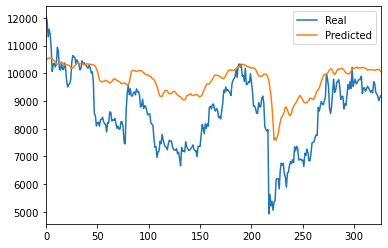

In [174]:
# Plot the real vs predicted prices as a line chart
btc_compare.plot()